# **Linear Regression**

In [56]:
# Creat some dataset
weight = 0.7
bais = 0.3

start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = X_regression * weight + bais

# Check the data
print(X_regression[:5], y_regression[:5])

print(len(X_regression), len(y_regression))

# Creat the Train and Test split
train_split = int(0.8 * len(X_regression))
print(train_split)

X_train_reg, y_train_reg = X_regression[:train_split], y_regression[:train_split]
X_test_reg, y_test_reg =  X_regression[train_split:], y_regression[train_split:]

# Check the length of each
len(X_train_reg), len(X_test_reg), len(y_train_reg), len(y_test_reg)

tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400]]) tensor([[0.3000],
        [0.3070],
        [0.3140],
        [0.3210],
        [0.3280]])
100 100
80


(80, 20, 80, 20)

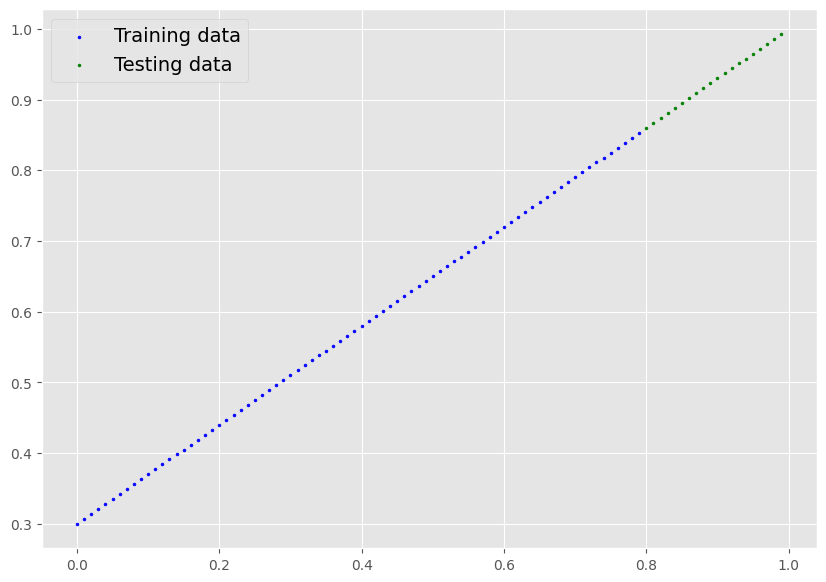

In [57]:
# Plot the Pre
plot_predictions(train_data=X_train_reg,
                 train_labels=y_train_reg,
                 test_data=X_test_reg,
                 test_labels=y_test_reg);

In [58]:
# Defining model to fit the string line
model_3 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

print(model_3)

# Loss and optimizer
loss_fn = nn.L1Loss() # MAE loss with regression data
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.01) #Try with lr=0.001

# accuracy - no accuracy_fn - regression  problem

# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_reg, X_test_reg  = X_train_reg.to(device),X_test_reg.to(device)
y_train_reg, y_test_reg =  y_train_reg.to(device), y_test_reg.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_3(X_train_reg)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_reg)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_3(X_test_reg)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_reg)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)
Epoch: 0 | Train loss: 0.75986, Test loss: 0.91103
Epoch: 100 | Train loss: 0.02858, Test loss: 0.00081
Epoch: 200 | Train loss: 0.02533, Test loss: 0.00209
Epoch: 300 | Train loss: 0.02137, Test loss: 0.00305
Epoch: 400 | Train loss: 0.01964, Test loss: 0.00341
Epoch: 500 | Train loss: 0.01940, Test loss: 0.00387
Epoch: 600 | Train loss: 0.01903, Test loss: 0.00379
Epoch: 700 | Train loss: 0.01878, Test loss: 0.00381
Epoch: 800 | Train loss: 0.01840, Test loss: 0.00329
Epoch: 900 | Train loss: 0.01798, Test loss: 0.00360


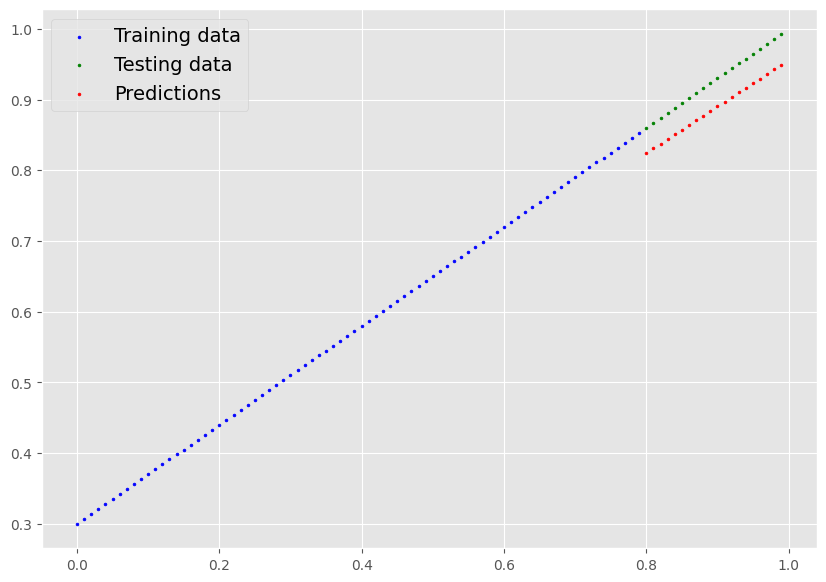

In [59]:
# Turn on evaluation mode
model_3.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_3(X_test_reg)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_reg.cpu(),
                 train_labels=y_train_reg.cpu(),
                 test_data=X_test_reg.cpu(),
                 test_labels=y_test_reg.cpu(),
                 predictions=y_preds.cpu());

## **Replicating non-linear activation functions**

**ReLU** $\rightarrow$ $$f(x) = max(0, x)$$


tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])


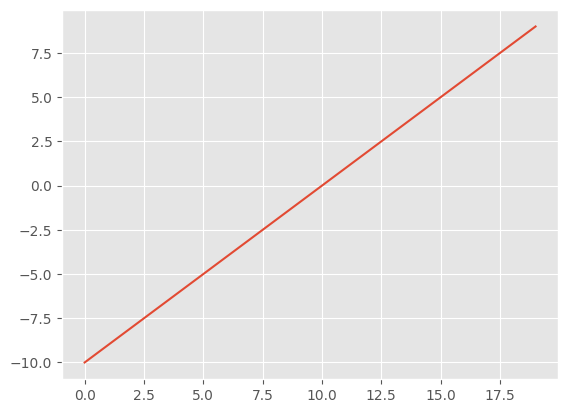

In [60]:
# Create a Tesnor
A = torch.arange(start=-10, end=10, step=1, dtype=torch.float32)
print(A)

# Visualize the toy tensor
plt.plot(A);

- So insted of using the PyTorch **ReLU** (`torch.nn.ReLU`), we'll recreate it ourself.
- The **ReLU** function turn all the negatives to zero and leaves the positive values as they are.

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])


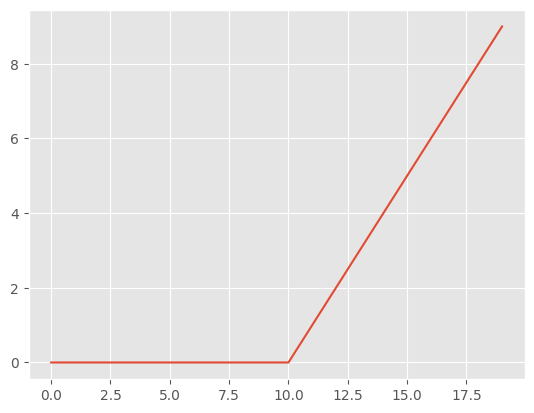

In [61]:
# Recreating the ReLU function
def relu_fn(x):
    return torch.maximum(torch.tensor(0), x)

# Pass the toy tensor through ReLU function
print(relu_fn(A))

# Plot ReLU activated toy tensor
plt.plot(relu_fn(A));

Sigmoid $\rightarrow$  $$S(x) = \frac{1}{1+e^{-x_i}}$$

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])


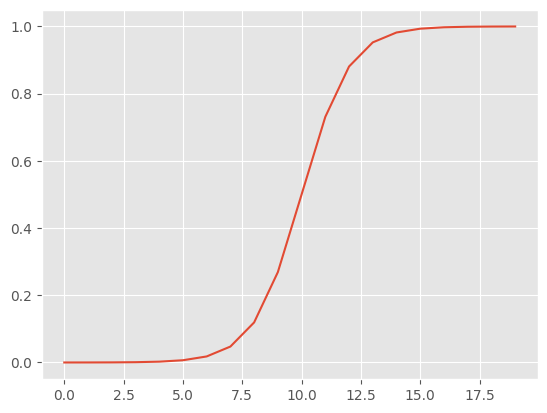

In [62]:
# Create a custom sigmoid function
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

# Test custom sigmoid on toy tensor
print(sigmoid(A))

# Plotting the Sigmoid Toy Tensor
plt.plot(sigmoid(A));